In [1]:
import pandas as pd
import zipfile
import os

In [2]:
# zip_ref=zipfile.ZipFile("/content/fraudTrain.csv.zip","r")
# with zip_ref.open('fraudTrain.csv') as csv_file:
#     df= pd.read_csv(csv_file)

# zip_ref.close()
# print(df.head())

In [3]:
df = pd.read_csv(r'C:\Users\aaith\OneDrive\Desktop\machine learning\Gihub\cleaned_fraud_data2.csv')
df.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,trans_year,age,age_group,Region,is_weekend,day_period,trans_month,job_sector
0,2019-01-01 00:00:18,8,4.97,0,3495,1988,0,0,31,1,4,0,3,4,5
1,2019-01-01 00:00:44,4,107.23,0,149,1978,0,0,41,2,0,0,3,4,1
2,2019-01-01 00:00:51,0,220.11,1,4154,1962,0,0,57,2,3,0,3,4,8
3,2019-01-01 00:01:16,2,45.00,1,1939,1967,0,0,52,2,3,0,3,4,5
4,2019-01-01 00:03:06,9,41.96,1,99,1986,0,0,33,1,4,0,3,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  int64  
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  int64  
 4   city_pop               1296675 non-null  int64  
 5   dob                    1296675 non-null  int64  
 6   is_fraud               1296675 non-null  int64  
 7   trans_year             1296675 non-null  int64  
 8   age                    1296675 non-null  int64  
 9   age_group              1296675 non-null  int64  
 10  Region                 1296675 non-null  int64  
 11  is_weekend             1296675 non-null  int64  
 12  day_period             1296675 non-null  int64  
 13  trans_month            1296675 non-null  int64  
 14  job_sector        

In [5]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])
df.head()


,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,trans_year,age,age_group,Region,is_weekend,day_period,trans_month,job_sector
0,2019-01-01 00:00:18,8,4.97,0,3495,1970-01-01 00:00:00.000001988,0,0,31,1,4,0,3,4,5
1,2019-01-01 00:00:44,4,107.23,0,149,1970-01-01 00:00:00.000001978,0,0,41,2,0,0,3,4,1
2,2019-01-01 00:00:51,0,220.11,1,4154,1970-01-01 00:00:00.000001962,0,0,57,2,3,0,3,4,8
3,2019-01-01 00:01:16,2,45.00,1,1939,1970-01-01 00:00:00.000001967,0,0,52,2,3,0,3,4,5
4,2019-01-01 00:03:06,9,41.96,1,99,1970-01-01 00:00:00.000001986,0,0,33,1,4,0,3,4,3


Probability Density Graph

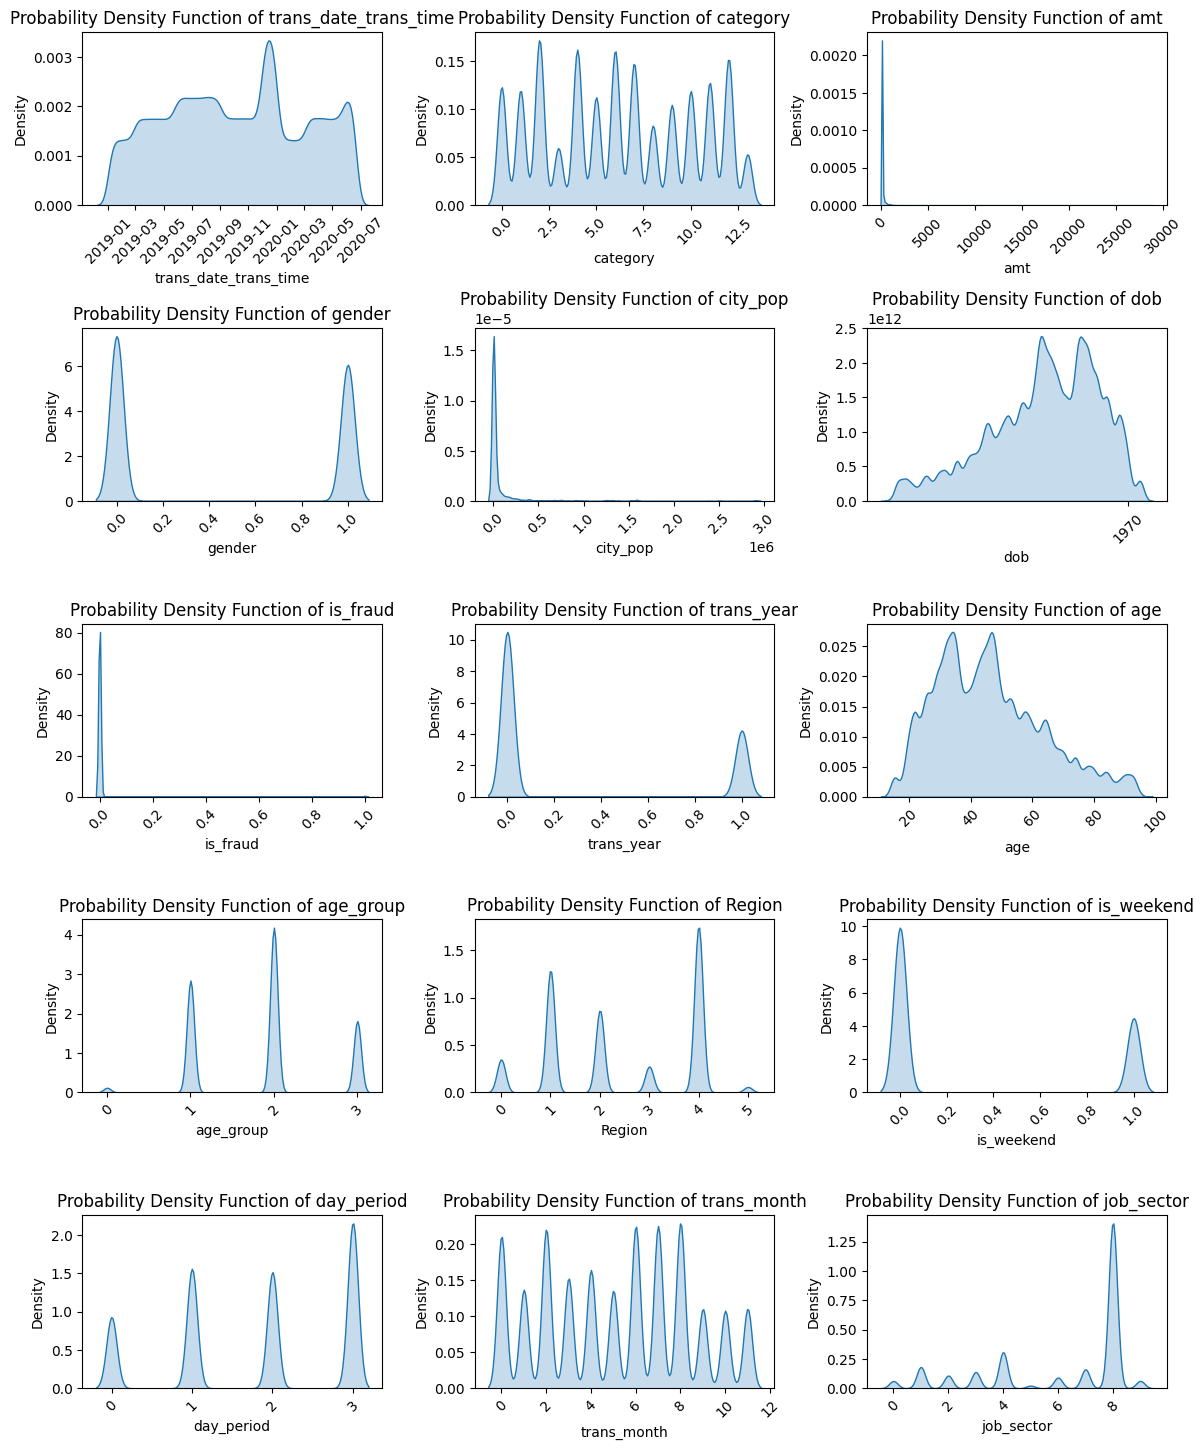

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the plotting grid
plt.figure(figsize=(12, 20))

# Loop through each column in the dataset and plot the PDF
for i, column in enumerate(df.columns, 1):
    plt.subplot(7, 3, i)
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Probability Density Function of {column}')
    plt.ylabel('Density')
    plt.xlabel(column)
    plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Cumulative Distribution Graph

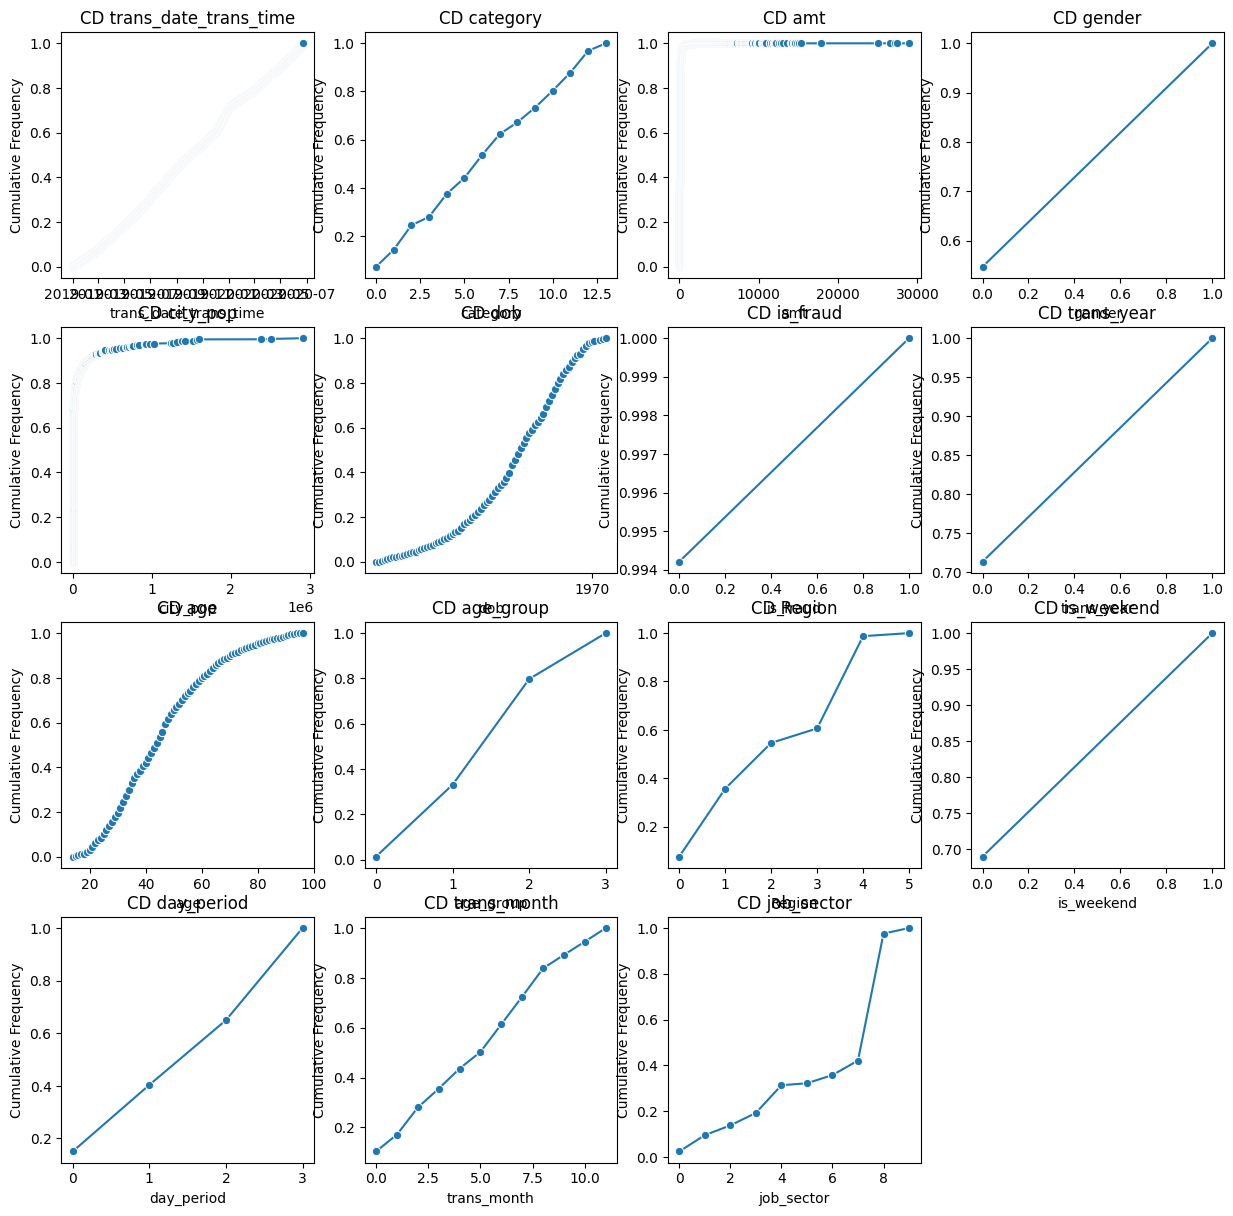

In [7]:
plt.figure(figsize=(15, 30))

for i, column in enumerate(df.columns, 1):
    plt.subplot(8, 4, i)
    value_counts = df[column].value_counts(normalize=True).sort_index()
    cumulative_distribution = value_counts.cumsum()
    sns.lineplot(x=cumulative_distribution.index, y=cumulative_distribution.values, marker='o')
    #plt.xticks(rotation=45)
    plt.title(f'CD {column}')
    plt.ylabel('Cumulative Frequency')
    plt.xlabel(column)


Age Group 0 - 14-18
Age Group 1 - 18-35
Age Group 2 - 35-60
Age Group 3 - 60+

<Figure size 1200x600 with 0 Axes>

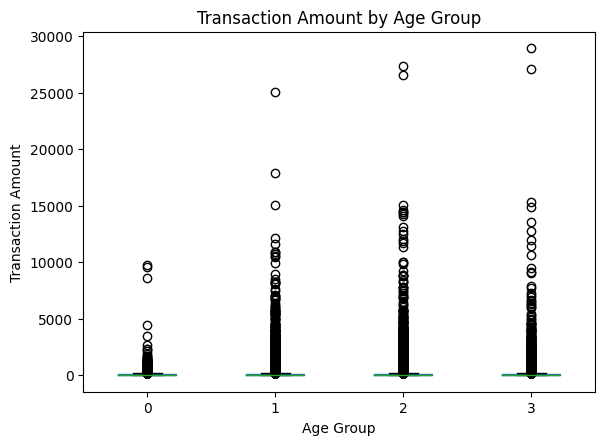

In [8]:
plt.figure(figsize=(12, 6))
df.boxplot(column='amt', by='age_group', grid=False)
plt.title('Transaction Amount by Age Group')
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount')
plt.show()

C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\3823656770.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5)


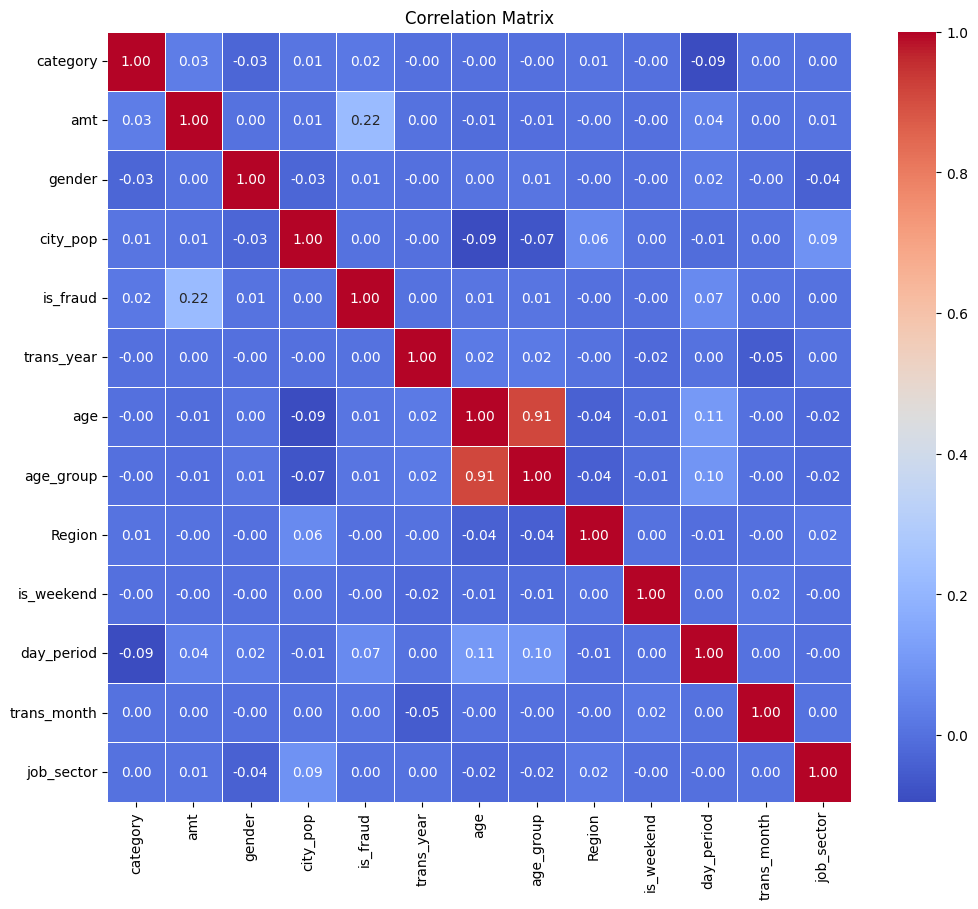

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\2470387228.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_vector = df.mean()


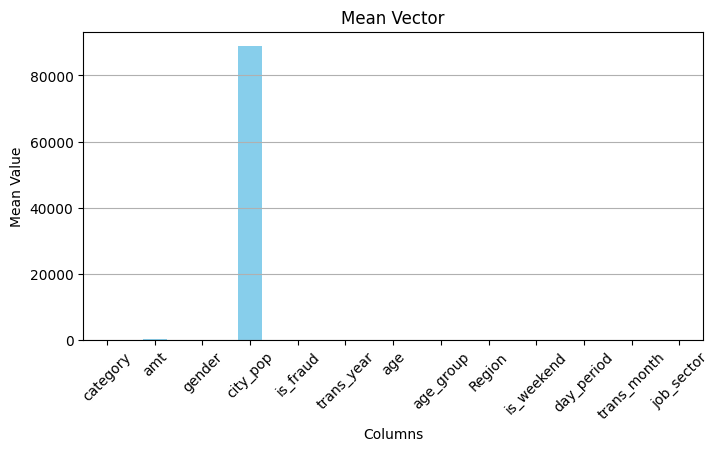

In [10]:
mean_vector = df.mean()

# Function to plot the mean vector
def plot_mean_vector(mean_vector):
    plt.figure(figsize=(8, 4))
    mean_vector.plot(kind='bar', color='skyblue')
    plt.title('Mean Vector')
    plt.xlabel('Columns')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Call the function
plot_mean_vector(mean_vector)

In [11]:
X = df['is_fraud'].value_counts()
X

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [12]:

counts = X.sort_index().values
counts

array([1289169,    7506], dtype=int64)

In [13]:
fraud = df[df.is_fraud == 1]
not_fraud = df[df.is_fraud == 0]

Fraud vs Non - Fraud

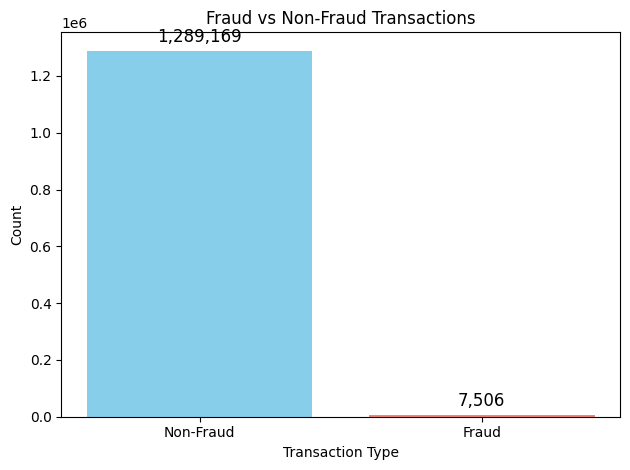

In [14]:
fraud_counts = df['is_fraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
counts = fraud_counts.sort_index().values

fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['skyblue', 'salmon'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)
ax.set_title('Fraud vs Non-Fraud Transactions')
ax.set_ylabel('Count')
ax.set_xlabel('Transaction Type')
plt.tight_layout()
plt.show()


Since the data has been encoded it was difficult to different categories.
If you would like to know the key value of the encoded part

unique_values = df['category'].drop_duplicates()
print(unique_values)

NOTE: the above code should be used on the original dataset and not on the encoded dataset

C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\240818429.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\240818429.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")


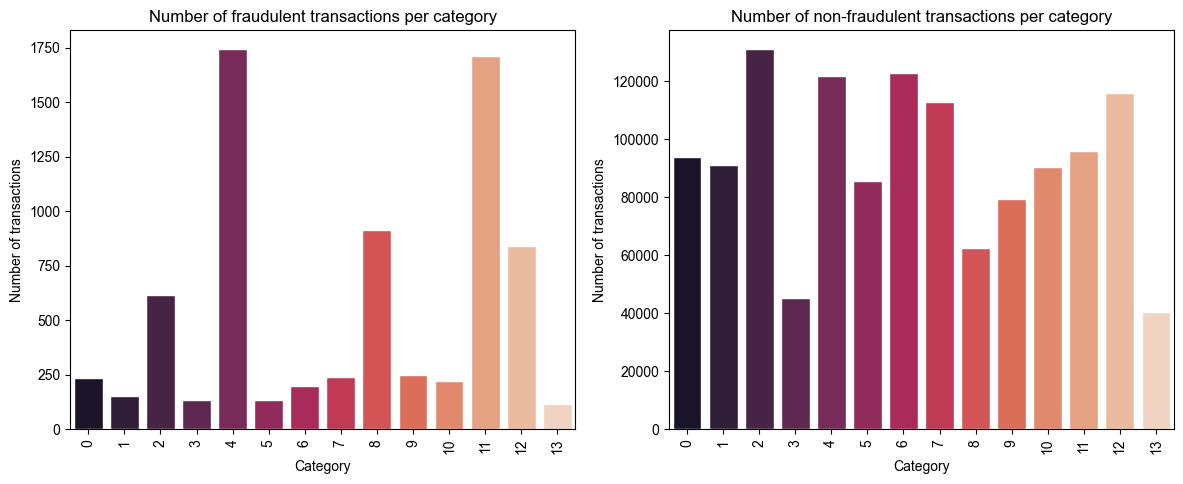

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

cat_fraud = fraud.category.value_counts().reset_index()
cat_fraud.columns = ["Category", "Counts"]
cat_not_fraud = not_fraud.category.value_counts().reset_index()
cat_not_fraud.columns = ["Category", "Counts"]

sns.barplot(x="Category", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
axes[0].set_title("Number of fraudulent transactions per category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="Category", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")
axes[1].set_title("Number of non-fraudulent transactions per category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Number of transactions")

axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

1 = male, 0 = female

C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\3350457526.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0], palette="rocket")
C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\3350457526.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1], palette="rocket")


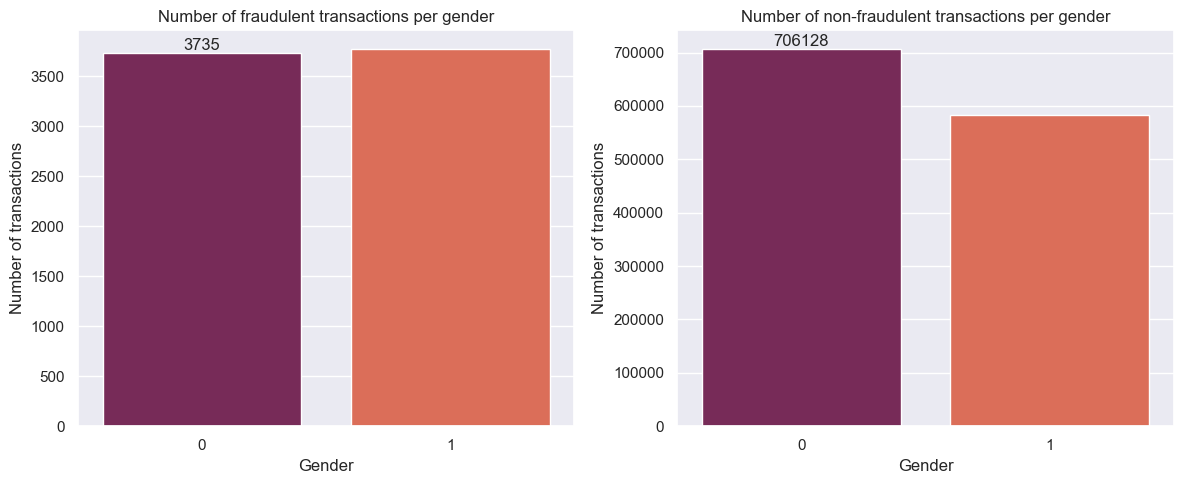

In [16]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

g_fraud = fraud.gender.value_counts().reset_index()
g_fraud.columns = ["Gender", "Counts"]
g_not_fraud = not_fraud.gender.value_counts().reset_index()
g_not_fraud.columns = ["Gender", "Counts"]

sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0], palette="rocket")
axes[0].set_title("Number of fraudulent transactions per gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1], palette="rocket")
axes[1].set_title("Number of non-fraudulent transactions per gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

The following are the values of the encoded part
0 - Other
1 - IT
2 - Education
3 - Marketing
4 - Healthcare
5 - Finance
6 - Manufacturing
7 - Construction
8 - Retail
9 - Legal

C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\181443294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="job_sector", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\181443294.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="job_sector", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")


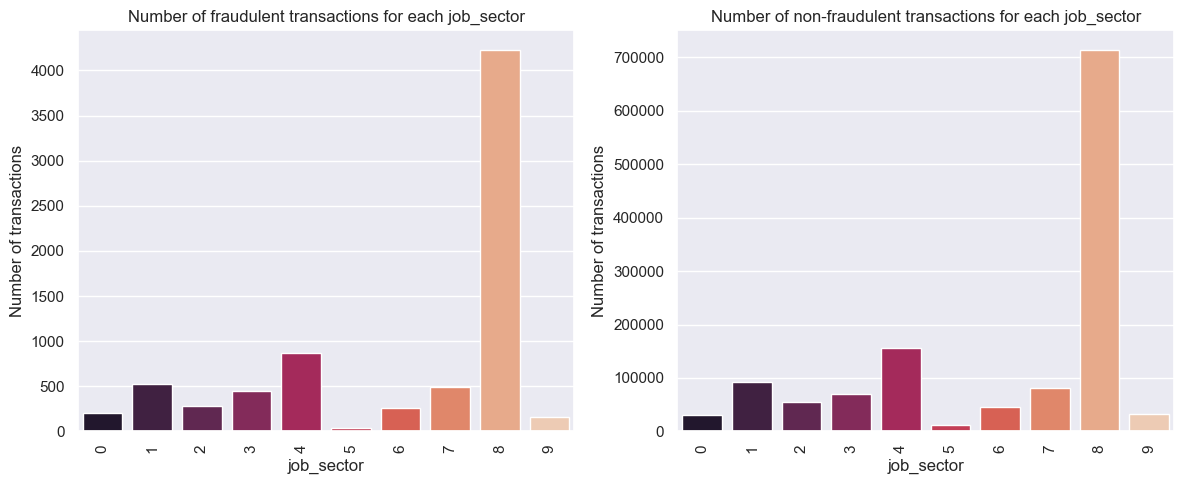

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

cat_fraud = fraud.job_sector.value_counts().reset_index()
cat_fraud.columns = ["job_sector", "Counts"]
cat_not_fraud = not_fraud.job_sector.value_counts().reset_index()
cat_not_fraud.columns = ["job_sector", "Counts"]

sns.barplot(x="job_sector", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
axes[0].set_title("Number of fraudulent transactions for each job_sector")
axes[0].set_xlabel("job_sector")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="job_sector", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")
axes[1].set_title("Number of non-fraudulent transactions for each job_sector")
axes[1].set_xlabel("job_sector")
axes[1].set_ylabel("Number of transactions")

axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

In [18]:
df.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city_pop', 'dob',
       'is_fraud', 'trans_year', 'age', 'age_group', 'Region', 'is_weekend',
       'day_period', 'trans_month', 'job_sector'],
      dtype='object')

Age Group 0 - 14-18
Age Group 1 - 18-35
Age Group 2 - 35-60
Age Group 3 - 60+

C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\1482448095.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="age_group", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\1482448095.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="age_group", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")


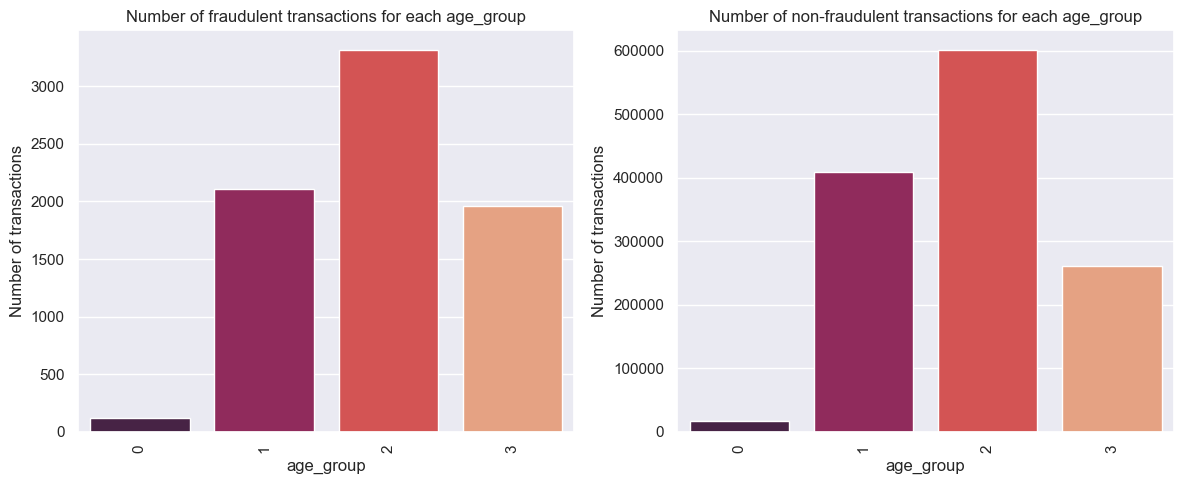

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

cat_fraud = fraud.age_group.value_counts().reset_index()
cat_fraud.columns = ["age_group", "Counts"]
cat_not_fraud = not_fraud.age_group.value_counts().reset_index()
cat_not_fraud.columns = ["age_group", "Counts"]

sns.barplot(x="age_group", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
axes[0].set_title("Number of fraudulent transactions for each age_group")
axes[0].set_xlabel("age_group")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="age_group", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")
axes[1].set_title("Number of non-fraudulent transactions for each age_group")
axes[1].set_xlabel("age_group")
axes[1].set_ylabel("Number of transactions")

axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

0 - March
1 - May
2 - February
3 - January
4 - June
5 - April
6 - Decemebr
7 - October
8 - September
9 - November
10 - August
11 - July

C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\3149380371.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="trans_month", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\3149380371.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="trans_month", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")


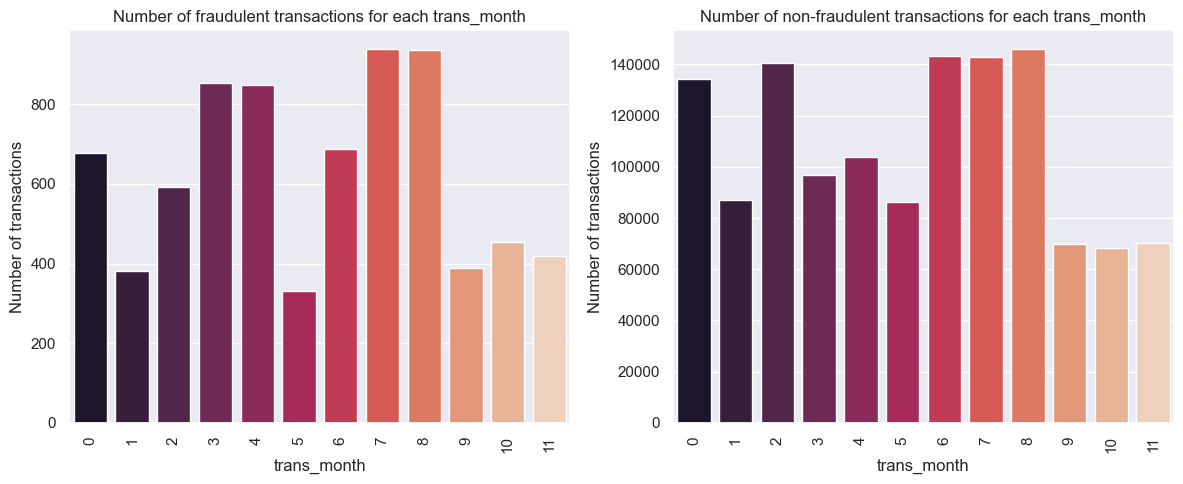

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

cat_fraud = fraud.trans_month.value_counts().reset_index()
cat_fraud.columns = ["trans_month", "Counts"]
cat_not_fraud = not_fraud.trans_month.value_counts().reset_index()
cat_not_fraud.columns = ["trans_month", "Counts"]

sns.barplot(x="trans_month", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
axes[0].set_title("Number of fraudulent transactions for each trans_month")
axes[0].set_xlabel("trans_month")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="trans_month", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")
axes[1].set_title("Number of non-fraudulent transactions for each trans_month")
axes[1].set_xlabel("trans_month")
axes[1].set_ylabel("Number of transactions")

axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\62719030.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\62719030.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")


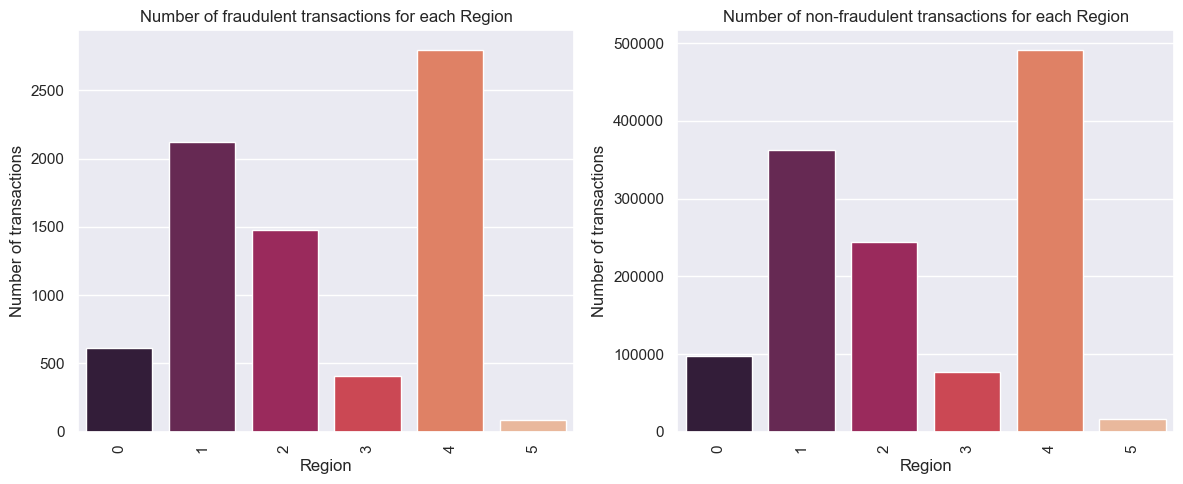

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

cat_fraud = fraud.Region.value_counts().reset_index()
cat_fraud.columns = ["Region", "Counts"]
cat_not_fraud = not_fraud.Region.value_counts().reset_index()
cat_not_fraud.columns = ["Region", "Counts"]

sns.barplot(x="Region", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
axes[0].set_title("Number of fraudulent transactions for each Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="Region", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")
axes[1].set_title("Number of non-fraudulent transactions for each Region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Number of transactions")

axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\629759039.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Counts", data=r_fraud, ax=axes[0], palette= "rocket")
C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\629759039.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Counts", data=r_not_fraud, ax=axes[1], palette="rocket")


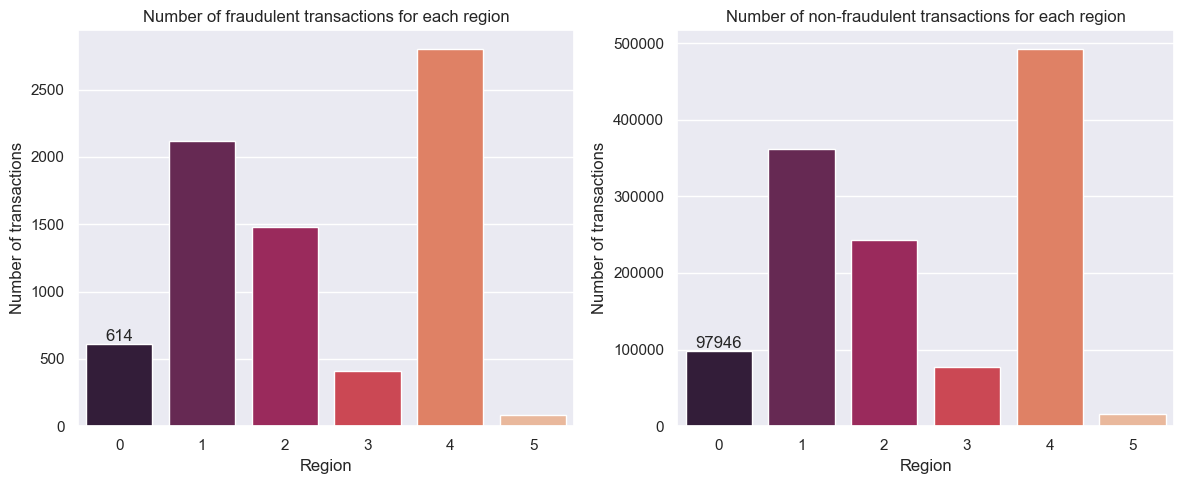

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

r_fraud = df[df.is_fraud == 1].Region.value_counts().reset_index()
r_fraud.columns = ["Region", "Counts"]
r_not_fraud = df[df.is_fraud == 0].Region.value_counts().reset_index()
r_not_fraud.columns = ["Region", "Counts"]

sns.barplot(x="Region", y="Counts", data=r_fraud, ax=axes[0], palette= "rocket")
axes[0].set_title("Number of fraudulent transactions for each region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Region", y="Counts", data=r_not_fraud, ax=axes[1], palette="rocket")
axes[1].set_title("Number of non-fraudulent transactions for each region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

C:\Users\aaith\AppData\Local\Temp\ipykernel_33852\2112870581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_category.values, y=fraud_by_category.index, palette='Blues_d')


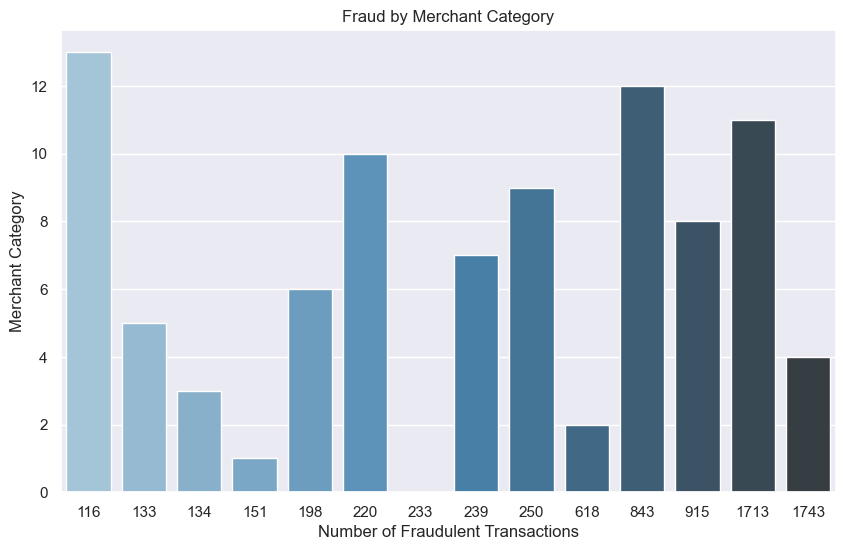

In [23]:
fraud_by_category = df[df['is_fraud'] == 1]['category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_category.values, y=fraud_by_category.index, palette='Blues_d')
plt.title('Fraud by Merchant Category')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Merchant Category')
plt.show()

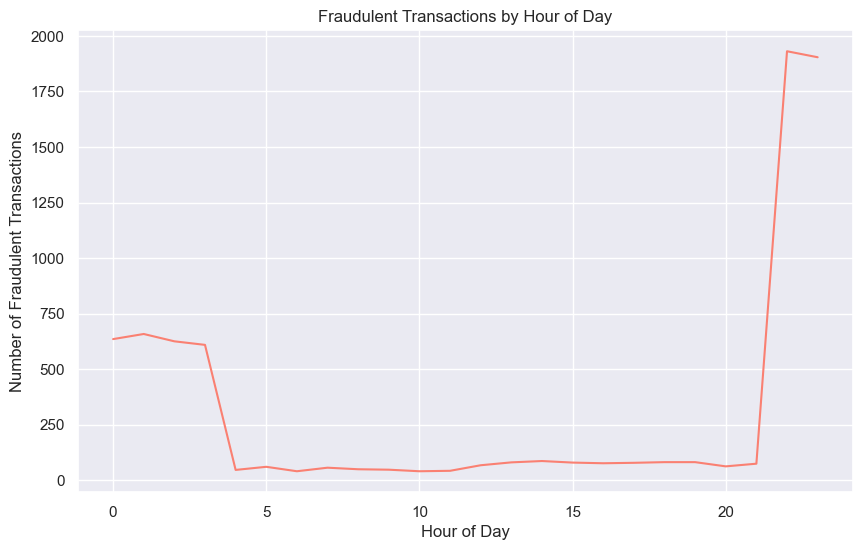

In [24]:
# Extracting hour of transaction from the datetime column
df['hour'] = df['trans_date_trans_time'].dt.hour

# Line plot for fraudulent transactions by hour of day
fraud_by_hour = df[df['is_fraud'] == 1].groupby('hour').size()
plt.figure(figsize=(10, 6))
fraud_by_hour.plot(kind='line', color='salmon')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


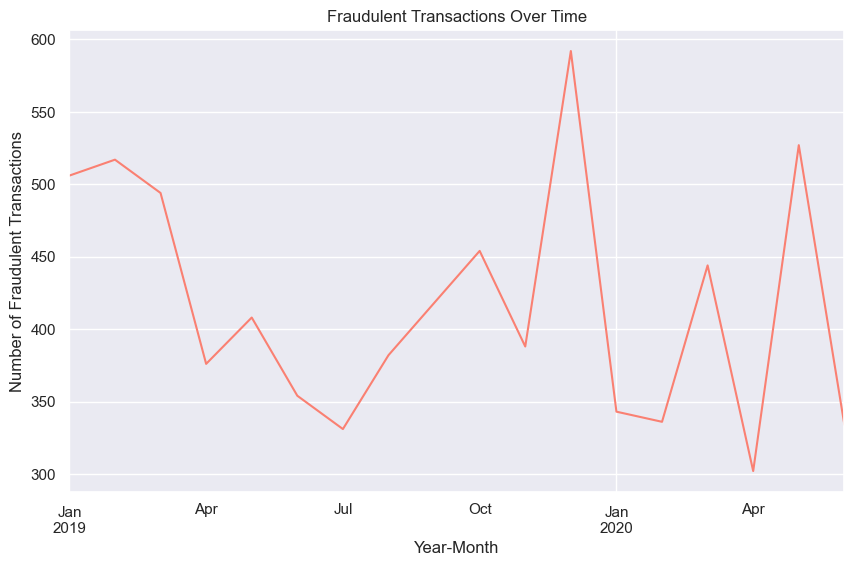

In [25]:
# Extracting month and year from the transaction datetime
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Line plot showing fraud over time
fraud_over_time = df[df['is_fraud'] == 1].groupby('year_month').size()
plt.figure(figsize=(10, 6))
fraud_over_time.plot(kind='line', color='salmon')
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


In [26]:
import plotly.graph_objects as go

# Extracting month and year from the transaction datetime
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Fraud counts per month
fraud_by_month = df[df['is_fraud'] == 1].groupby('year_month').size()

# Convert to string format for Plotly
fraud_by_month.index = fraud_by_month.index.astype(str)

# Create the line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fraud_by_month.index,
    y=fraud_by_month.values,
    mode='lines+markers',
    line=dict(color='salmon', width=2),
    marker=dict(size=8),
    name="Fraud Count"
))

fig.update_layout(
    title="Seasonal Trends in Fraudulent Transactions",
    xaxis_title="Month-Year",
    yaxis_title="Number of Fraudulent Transactions",
    template="plotly_white"
)

fig.show()
